In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
image_1 = cv2.imread('image1.jpeg', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('image2.jpeg', cv2.IMREAD_GRAYSCALE)

In [32]:
def calculate_disparity(image_1, image_2,blockSize):
    stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=blockSize)
    disparity = stereo.compute(image_1, image_2)
    # Normalizing the image
    disparity_normalized = cv2.normalize(disparity, disparity, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return disparity, disparity_normalized

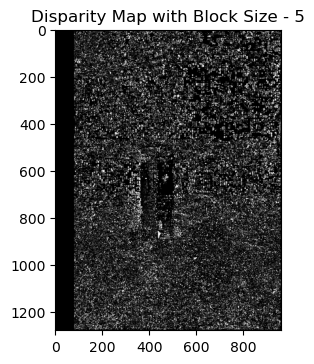

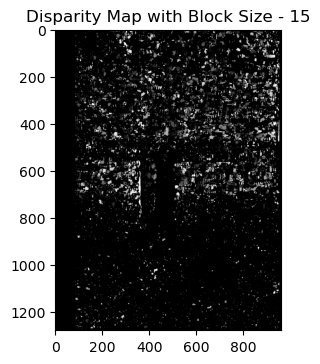

In [33]:
disparity, disparity_normalized = calculate_disparity(image_1, image_2, 5)

plt.subplot(1, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map with Block Size - 5')
plt.show()


plt.subplot(1, 2, 2)
disparity_15, disparity_normalized_15 = calculate_disparity(image_1, image_2, 15)
plt.imshow(disparity_15, cmap='gray')
plt.title('Disparity Map with Block Size - 15')
plt.show()

In [34]:
def calculate_depth(disparity, focal_length, baseline):
    with np.errstate(divide='ignore', invalid='ignore'):
        depth = (focal_length * baseline) / disparity
        depth[disparity == 0] = 0
    return depth

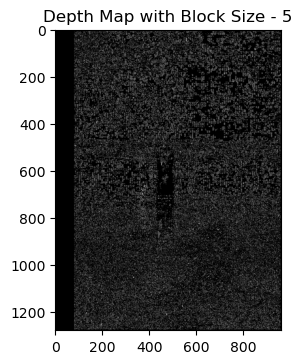

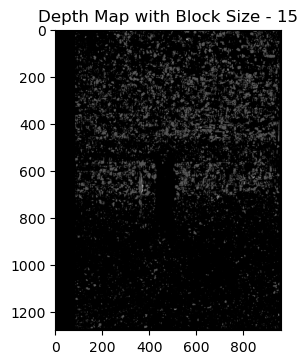

In [35]:
focal_length = 1430 # Calculated in Assignment 1
baseline = 7.5 # In cm

depth = calculate_depth(disparity, focal_length, baseline)
depth_15 = calculate_depth(disparity_15, focal_length, baseline)
            
plt.subplot(1, 2, 1)
plt.imshow(depth, cmap='gray')
plt.title('Depth Map with Block Size - 5')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(depth_15, cmap='gray')
plt.title('Depth Map with Block Size - 15')
plt.show()

## In the images taken, the distance from the image border to the top of the marker in Image 1 (L1) is 450 pixels, and the distance from the image border to the top of the marker in Image 2 (L2) is 670 pixels

In [36]:
def calculate_marker_depth(disparity, focal_length, baseline):
    depth = (focal_length * baseline) / disparity
    return depth

focal_length = 1430 # Calculated in Assignment 1
baseline = 7.5 # In cm
disparity = abs(670 - 450)

depth = calculate_marker_depth(disparity, focal_length, baseline)
print("Depth (in cms): "+str(depth))

Depth (in cms): 48.75
